# Test RV Shifts on a Tapas spectrum


The idea behind this is to load a tapas spectrum (to represent an atmopshere spectrum) and then shift it by the RV Calculation for the HD30501 planet.



In [4]:
# Thi

from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import TelluricSpectra.Obtain_Telluric as obt

from PyAstronomy import pyasl   # for doppler shift

In [27]:
tapas_all = "HD30501_data/1/tapas_2012-04-07T00-24-03_ReqId_10_R-50000_sratio-10_barydone-NO.ipac"
#tapas_h20 = "HD30501_data/1/tapas_2012-04-07T00-24-03_ReqId_12_No_Ifunction_barydone-NO.ipac"
tapas_not_h20 = "HD30501_data/1/tapas_2012-04-07T00-24-03_ReqId_18_R-50000_sratio-10_barydone-NO.ipac"
tapas_file = tapas_all
#tapas_file = tapas_not_h20

tapas_data, tapas_hdr = obt.load_telluric("", tapas_file)
tapas_airmass = float(tapas_hdr["airmass"])


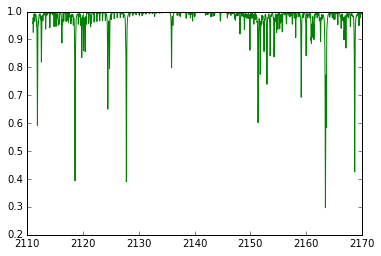

In [28]:
plt.figure()
plt.plot(tapas_data[0], tapas_data[1], "-g", label="tapas")
plt.show()

## Test planet with Star RV value
HD30501 value of  124.6 m/s

In [29]:
tapas_data[1] = tapas_data[1] * 0.004   # Scaled by F/Fstar ratio


hd30501_rv_diff12 = -1174.88    # m/s
hd30501_rv_diff23 = -10.00   # m/s
hd30501_rv_diff34 = -41.296    # m/s

# radial velocity shift spectrum
new_flux_12 , new_wls_12 = pyasl.dopplerShift(tapas_data[0], tapas_data[1], hd30501_rv_diff12/1000., edgeHandling="firstlast")
new_flux_23 , new_wls_23 = pyasl.dopplerShift(tapas_data[0], tapas_data[1], hd30501_rv_diff23/1000., edgeHandling="firstlast")
new_flux_34 , new_wls_34 = pyasl.dopplerShift(tapas_data[0], tapas_data[1], hd30501_rv_diff34/1000., edgeHandling="firstlast")


subtracted_flux_12 = tapas_data[1] - new_flux_12
subtracted_flux_23 = tapas_data[1] - new_flux_23
subtracted_flux_34 = tapas_data[1] - new_flux_34

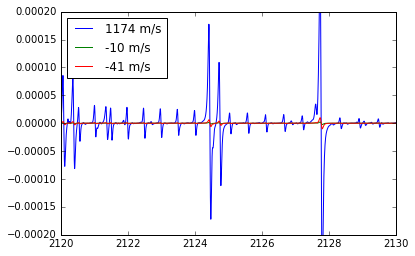

In [35]:
plt.figure()
plt.plot(tapas_data[0], subtracted_flux_12, label="1174 m/s")
plt.plot(tapas_data[0], subtracted_flux_23, label="-10 m/s")
plt.plot(tapas_data[0], subtracted_flux_34, label="-41 m/s")
plt.xlim([2120,2130])
plt.ylim([-0.0002, 0.0002])
plt.legend(loc=0)
plt.show()

In this case the Radial velocity of 100 m/s is enough to observe a small signal. 
Hopefully the planet RV will be better/give a larger signal.

## Radial Velocity tests

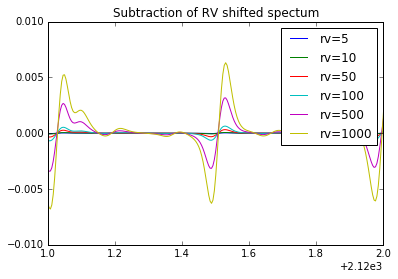

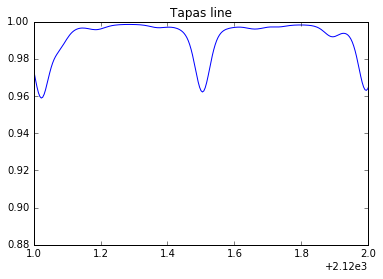

In [50]:
rv_diffs = [5, 10, 50, 100, 500, 1000]    # m/s

# radial velocity shift spectrum
plt.figure()
for rv in rv_diffs:
    new_flux , new_wls = pyasl.dopplerShift(tapas_not_h20_data[0], tapas_not_h20_data[1], rv/1000., edgeHandling="firstlast")
    sub = tapas_not_h20_data[1] - new_flux
    
    plt.plot(tapas_not_h20_data[0], sub, label="rv={}".format(rv))
plt.xlim([2121,2122])
plt.ylim([-0.01,0.01])
plt.legend()
plt.title("Subtraction of RV shifted spectum")
plt.show()

plt.figure()
plt.plot(tapas_not_h20_data[0], tapas_not_h20_data[1])
plt.xlim([2121,2122])
#plt.ylim([-0.01,0.01])
#plt.legend()
plt.title("Tapas line")
plt.show()